## Advanced Numerical  Methods in Many-Body Physics
# Exercise 4
### Jesse Hoogland 

--- 
Note: most of the actual computational logic is in the file `heisenberg.py` included in this directory.

## Imports

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from heisenberg import *  

# Keep 3 digits of accuracy, and avoid scientific notation when possible.
np.set_printoptions(precision=3, suppress=True) 

# 7.1 Computing matrix elements

The Heisenberg model:

$$\hat H = J \sum_{\langle i, j \rangle} \hat S_i^z \hat S_j^z + \frac{1}{2}(\hat S_i^+ \hat S_j^- + \hat S_i^- \hat S_j^+)$$

## a) 2 sites with Spin-1/2

### i. Compute the matrix elements by hand

$$\hat S^z = \frac{1}{2}\begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}$$
$$\hat S^+ = \begin{pmatrix}0 & 1 \\ 0 & 0\end{pmatrix}$$
$$\hat S^- = \begin{pmatrix}0 & 0 \\ 1 & 0\end{pmatrix}$$

Expanding:

$$\hat S_i^z \hat S_j^z = \frac{1}{2}\begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}\otimes \frac{1}{2}\begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix} = \frac{1}{4}\text{diag}(1, -1, -1, 1)$$
$$\hat S_i^+ \hat S_j^- =\begin{pmatrix}0 & 1 \\ 0 & 0\end{pmatrix}\otimes\begin{pmatrix}0 & 0 \\ 1 & 0\end{pmatrix} = \begin{pmatrix}0&0&0&0\\0&0&1&0\\0&0&0&0\\0&0&0&0\end{pmatrix}$$
$$\hat S_i^- \hat S_j^+ = \begin{pmatrix}0 & 0 \\ 1 & 0\end{pmatrix}\otimes \begin{pmatrix}0 & 1 \\ 0 & 0\end{pmatrix} =\begin{pmatrix}0&0&0&0\\0&0&0&0\\0&1&0&0\\0&0&0&0\end{pmatrix}$$

Combining:
$$\hat H= \frac{J}{4}\begin{pmatrix}1&0&0&0\\0&-1&2&0\\0&2&-1&0\\0&0&0&1\end{pmatrix}$$

Now we can solve for the eigenvalues with:
$$\det \left( \hat H - \lambda \mathcal 1\right)=0.$$

Solving this, we get the eigenvalues $\lambda = \frac{J}{4}$ (with 
multiplicity 2), $-\frac{3J}{4}, -\frac{J}{4}$.

Let's find the corresponding eigenvectors:

$$ \frac{J}{4}\begin{pmatrix}1&0&0&0\\0&-1&2&0\\0&2&-1&0\\0&0&0&1\end{pmatrix}\begin{pmatrix}a\\b\\c\\d\end{pmatrix}= \lambda \begin{pmatrix}a\\b\\c\\d\end{pmatrix}$$
$$
\frac{J}{4}\begin{pmatrix}a\\-b+2c\\2b -c\\d\end{pmatrix} = \lambda \begin{pmatrix}a\\b\\c\\d\end{pmatrix}$$

Plugging in our eigenvalues, we get:

$$\lambda=\frac{J}{4} \quad\Rightarrow\quad \vec v = (1,0,0,0)^T = |\uparrow \uparrow\rangle$$
$$\lambda=\frac{J}{4} \quad\Rightarrow\quad \vec v = (0,0,0,1)^T = |\downarrow \downarrow\rangle$$
$$\lambda=\frac{J}{4} \quad\Rightarrow\quad \vec v = \frac{1}{\sqrt 2}(0,1,1,0)^T= \frac{1}{\sqrt 2}(|\uparrow \downarrow\rangle + |\downarrow \uparrow \rangle $$
$$\lambda=\frac{-3J}{4}\quad\Rightarrow\quad \vec v = \frac{1}{\sqrt 2}(0,1,-1,0)^T= \frac{1}{\sqrt 2}(|\uparrow \downarrow\rangle - |\downarrow \uparrow \rangle $$.

Exactly as we expect from quantum I, the excited triplet and the lower-level singlet.


### ii. Compute the pmatrix elements using `np.kron` and `np.linalg.eig`


In [2]:
def heisenberg_2_site_spin_half(): 
    # Check out the included `heisenberg.py` module for most of the logic
    system = HeisenbergSpinHalf()
    system.diagonalize(verbose=True)
    
heisenberg_2_site_spin_half()

Heisenberg chain of 2 spin-0.5 particles with J=1.0
Hamiltonian (in matrix form):
[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]

Number of bytes: 128
Eigenvalues:
[-0.75  0.25  0.25  0.25]

With corresponding eigenvectors (respectively):
[[ 0.     1.     0.     0.   ]
 [ 0.707  0.     0.707  0.   ]
 [-0.707  0.     0.707  0.   ]
 [ 0.     0.     0.     1.   ]]


## b) S=1
### i. Compute the eigenvalues by hand

$$\hat S^z = \begin{pmatrix}1 & 0 & 0 \\ 0 &0 & 0 \\ 0 & 0 &  -1\end{pmatrix}$$
$$\hat S^+ = \frac{1}{\sqrt 2}\begin{pmatrix}0 & 1 & 0\\ 0 & 0& 1 \\ 0 & 0 & 0\end{pmatrix}$$
$$\hat S^- = \frac{1}{\sqrt 2}\begin{pmatrix}0 & 0 &0\\ 1 & 0&0\\0&1&0\end{pmatrix}$$

We can easily deduce the form of $\hat S^\pm$ from their action on the eigenstates of the $\hat S^z$ operator, i.e. $|\uparrow\rangle\rightarrow0$, $|0\rangle\rightarrow |\uparrow\rangle$, etc., and the particular normalization constant from the equations (2 and 3) provided.

Again, we take the Kronecker product.
Then, summing these terms together, we get for the Hamiltonian:

$$\hat H = J \begin{pmatrix} 
1 & 0 & 0 & 0& 0 & 0 & 0& 0 & 0\\
0 & 0 & 0 & 1& 0 & 0 & 0& 0 & 0\\
0 & 0 & -1 & 0& 1 & 0 & 0& 0 & 0\\
0 & 1 & 0 & 0& 0 & 0 & 0& 0 & 0\\
0 & 0 & 1 & 0& 0 & 0 & 1& 0 & 0\\
0 & 0 & 0 & 0& 0 & 0 & 0& 1 & 0\\
0 & 0 & 0 & 0& 1 & 0 & -1& 0 & 0\\
0 & 0 & 0 & 0& 0 & 1 & 0& 0 & 0\\
0 & 0 & 0 & 0& 0 & 0 & 0& 0 & 1
\end{pmatrix}$$

At this point, you can plug this into Wolfram alpha and get the corresponding eigenvalues: 
$$-2,(-1)^3,(1)^5.$$
I've omitted the full eigenvectors for brevity's sake (they're included below as determined by the computer).

In [3]:
def heisenberg_2_site_spin_one(): 
    system = HeisenbergSpinOne()
    system.diagonalize(verbose=True)

heisenberg_2_site_spin_one()

Heisenberg chain of 2 spin-1 particles with J=1
Hamiltonian (in matrix form):
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]]

Number of bytes: 648
Eigenvalues:
[-2. -1. -1. -1.  1.  1.  1.  1.  1.]

With corresponding eigenvectors (respectively):
[[ 0.    -0.    -0.     0.     1.     0.     0.     0.     0.   ]
 [ 0.    -0.707 -0.     0.     0.     0.     0.    -0.707  0.   ]
 [ 0.577  0.    -0.     0.707  0.     0.     0.     0.    -0.408]
 [ 0.     0.707 -0.     0.     0.     0.     0.    -0.707  0.   ]
 [-0.577 -0.    -0.    -0.     0.     0.     0.     0.    -0.816]
 [ 0.    -0.     0.707  0.     0.     0.     0.707  0.     0.   ]
 [ 0.577 -0.     0.    -0.707  0.     0.     0.     

# 7.2 Exact diagonalization of Heisengberg spin chains.

For the sake of brevity, I display only the list of eigenvalues for the following problems (otherwise you get horrible 16x16 matrices). If you want to see the full picture, just change `verbose=False` to `verbose=True`.

## 7.2.1 Four-site Spin-1/2 chain


In [4]:
def heisenberg_4_site_spin_half(): 
    system = HeisenbergSpinHalf(n_spins=4)
    print("Eigenvalues: {}".format(system.diagonalize(verbose=True)[0]))

print("Heisenberg model for spin-1/2 with four sites, OPEN boundary conditions, and dense matrices.")
heisenberg_4_site_spin_half()

Heisenberg model for spin-1/2 with four sites, OPEN boundary conditions, and dense matrices.
Heisenberg chain of 4 spin-0.5 particles with J=1.0
Hamiltonian (in matrix form):
[[ 0.75  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  ]
 [ 0.    0.25  0.5   0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  ]
 [ 0.    0.5  -0.25  0.    0.5   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.25  0.    0.5   0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  ]
 [ 0.    0.    0.5   0.   -0.25  0.    0.    0.    0.5   0.    0.    0.
   0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.5   0.   -0.75  0.5   0.    0.    0.5   0.    0.
   0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.5  -0.25  0.    0.    0.    0.5   0.
   0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.25  0.    0.    0.    0.5
   0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.5  

## 7.2.2 Four site spin-1/2 with periodic boundaries

In [5]:
def heisenberg_4_site_spin_half_periodic(): 
    system = HeisenbergSpinHalf(n_spins=4, bdry_conds="periodic")
    print("Eigenvalues: {}".format(system.diagonalize(verbose=False)[0]))

print("Heisenberg model for spin-1/2 with four sites, PERIODIC boundary conditions, and dense matrices.")
heisenberg_4_site_spin_half_periodic()

Heisenberg model for spin-1/2 with four sites, PERIODIC boundary conditions, and dense matrices.
Eigenvalues: [-2. -1. -1. -1. -0. -0. -0.  0.  0.  0.  0.  1.  1.  1.  1.  1.]


## 7.2.3 Four site spin-1/2 with sparse matrices
I only include the first 4 eigenvalues for these matrices. If you want more, you can adapt `n_eigvals=4` to your preferred number of eigenvalues.
 
### 7.2.3.i Open Boundaries

In [6]:
def heisenberg_4_site_spin_half_sparse(): 
    system = HeisenbergSpinHalf(n_spins=4, mode="sparse")
    print("First 4 eigenvalues: {}".format(system.diagonalize(verbose=False, n_eigvals=4)[0]))
    
print("Heisenberg model for spin-1/2 with four sites, OPEN boundary conditions, and SPARSE matrices.")
heisenberg_4_site_spin_half_sparse()

Heisenberg model for spin-1/2 with four sites, OPEN boundary conditions, and SPARSE matrices.
First 4 eigenvalues: [-1.616 -0.957 -0.957 -0.957]


### 7.2.3.ii Periodic Boundaries

In [7]:
def heisenberg_4_site_spin_half_sparse_periodic(): 
    system = HeisenbergSpinHalf(n_spins=4, mode="sparse", bdry_conds="periodic")
    print("First 4 eigenvalues: {}".format(system.diagonalize(verbose=False, n_eigvals=4)[0]))

print("Heisenberg model for spin-1/2 with four sites, PERIODIC boundary conditions, and SPARSE matrices.")

heisenberg_4_site_spin_half_sparse_periodic()

Heisenberg model for spin-1/2 with four sites, PERIODIC boundary conditions, and SPARSE matrices.
First 4 eigenvalues: [-2. -1. -1. -1.]


### Compare the memory usage:

For the dense matrix, the Hamiltonian used 2048 bytes (both times the same amount for obvious reasons). For the sparse matrix versions, we used 320 and 288 bytes respectively. That's getting an improvement of 6-8 times! We see an added benefit that using sparse matrices allows the memory needed to vary with the number of non-zero elements.

## 7.2.4 Energy variation with chain length

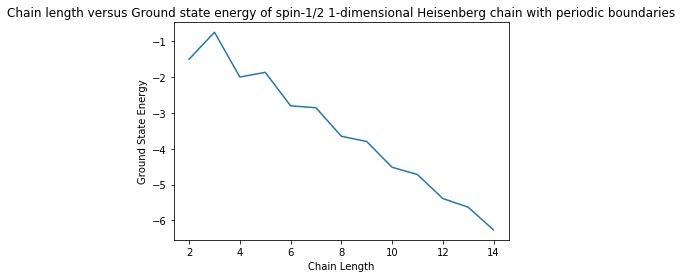

In [8]:
def heisenberg_energy_with_chain_length():
    chain_lengths = np.arange(2,15)
    ground_states = np.zeros(chain_lengths.size)
    
    for i, chain_length in enumerate(chain_lengths):
        system = HeisenbergSpinHalf(n_spins=chain_length, mode="sparse", bdry_conds="periodic")
        ground_states[i] = system.diagonalize(verbose=False, n_eigvals=1)[0][0]
        
    plt.plot(chain_lengths, ground_states)
    plt.title("Chain length versus Ground state energy of spin-1/2 1-dimensional Heisenberg chain with periodic boundaries")
    plt.xlabel("Chain Length")
    plt.ylabel("Ground State Energy")
    
heisenberg_energy_with_chain_length()

### Why is this oscillatory?

Using classical intution, we see that when we have an even number of classical spins, we can orient all neighboring spins with opposite spins. With an odd number of classical spins, we would end up with a pair of neighboring spins which have the same spin value. This is energetically less favorable. The quantum ground state won't correspond exactly to this classical ground state, but it will be "close."

## 7.2.5 Energy gaps


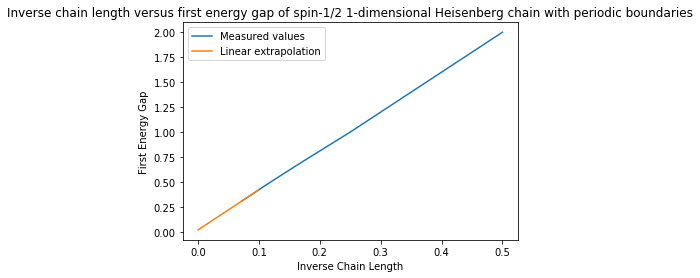

In [9]:
def heisenberg_energy_gaps():
    chain_lengths = np.arange(2,16,2)
    energy_gaps = np.zeros(chain_lengths.size)
    
    for i, chain_length in enumerate(chain_lengths):
        system=HeisenbergSpinHalf(n_spins=chain_length, mode="sparse", bdry_conds="periodic")
        eigvals = system.diagonalize(verbose=False, n_eigvals=2)[0]
        energy_gaps[i]= eigvals[1]-eigvals[0]
        
    # Fitting to the form y = mx + b where x = 1./chain_length and y=energy_gap
    [m, b] = np.polyfit(1./chain_lengths[-4:], energy_gaps[-4:], deg=1)
        
    # We extrapolate over the range 0 to 0.1 for the inverse chain length
    regression_xs = np.arange(0, 0.1,0.001)
    regression_ys = m*regression_xs + b
    
    plt.plot(1./chain_lengths, energy_gaps, label="Measured values")
    plt.plot(regression_xs, regression_ys, label="Linear extrapolation")
    plt.title("Inverse chain length versus first energy gap of spin-1/2 1-dimensional Heisenberg chain with periodic boundaries")
    plt.xlabel("Inverse Chain Length")
    plt.ylabel("First Energy Gap")
    plt.legend()
    
heisenberg_energy_gaps()

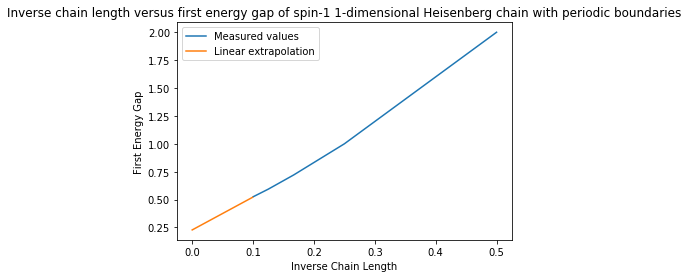

In [10]:
def heisenberg_spin_one_energy_gaps():
    chain_lengths = np.arange(2,11,2)
    energy_gaps = np.zeros(chain_lengths.size)
    
    for i, chain_length in enumerate(chain_lengths):
        system=HeisenbergSpinOne(n_spins=chain_length, mode="sparse", bdry_conds="periodic")
        eigvals = system.diagonalize(verbose=False, n_eigvals=2)[0]
        energy_gaps[i]= eigvals[1]-eigvals[0]
        
    # Fitting to the form y = mx + b where x = 1./chain_length and y=energy_gap
    [m, b] = np.polyfit(1./chain_lengths[-3:], energy_gaps[-3:], deg=1)
        
    # We extrapolate over the range 0 to 0.1 for the inverse chain length
    regression_xs = np.arange(0, 0.1,0.001)
    regression_ys = m*regression_xs + b
    
    plt.plot(1./chain_lengths, energy_gaps, label="Measured values")
    plt.plot(regression_xs, regression_ys, label="Linear extrapolation")
    plt.title("Inverse chain length versus first energy gap of spin-1 1-dimensional Heisenberg chain with periodic boundaries")
    plt.xlabel("Inverse Chain Length")
    plt.ylabel("First Energy Gap")
    plt.legend()
    
heisenberg_spin_one_energy_gaps()